## 10주차 : 09장 데이터 분석 프로젝트

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
pip install koreanize_matplotlib

In [4]:
%config InlineBackend.figure_format = 'retina'

In [5]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [9]:
pd.set_option('display.precision',2)
# : 숫자 출력 시 소수점 아래 자릿수 설정

In [8]:
df_mpg = mpg.groupby('drv').agg(mean_hwy = ('hwy','mean'))
df_mpg

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [13]:
df_mpg = mpg.groupby('drv', as_index=False).agg(mean_hwy = ('hwy','mean'))
df_mpg
# as_index : 옵션 파라미터, 그룹화한 열을 인덱스로 설정할지 말지 결정

,drv,mean_hwy
0,4,19.17
1,f,28.16
2,r,21.00


In [15]:
plt.rcParams.update({'figure.figsize':[5,3]})
# : matplotlib 그래프의 기본 크기 설정

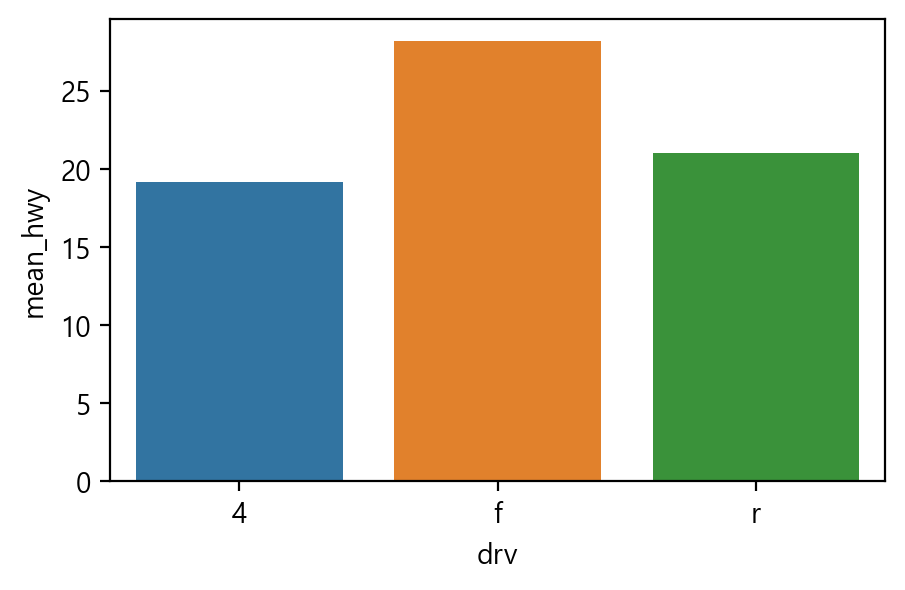

In [16]:
sns.barplot(df_mpg, x = 'drv', y = 'mean_hwy');

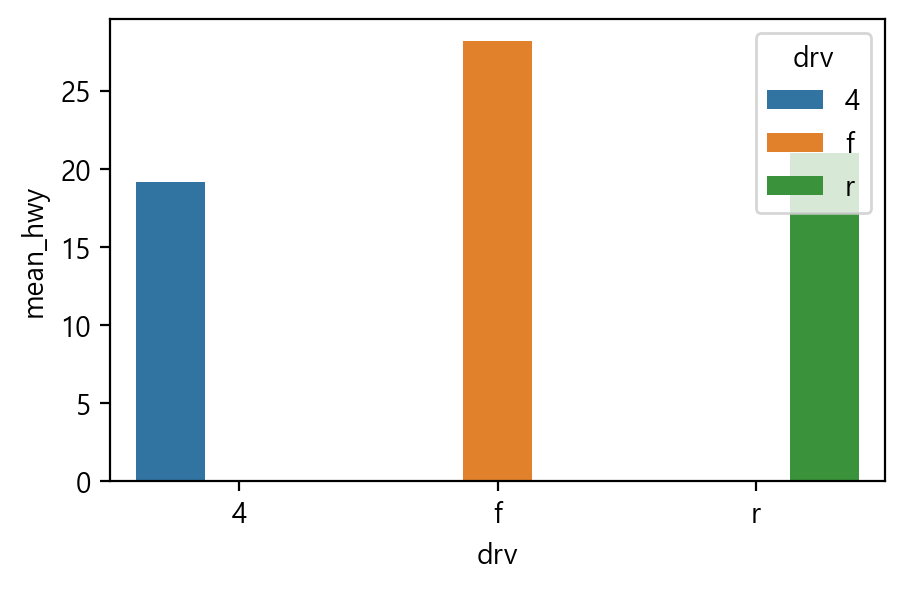

In [17]:
sns.barplot(df_mpg, x='drv', y='mean_hwy', hue='drv');

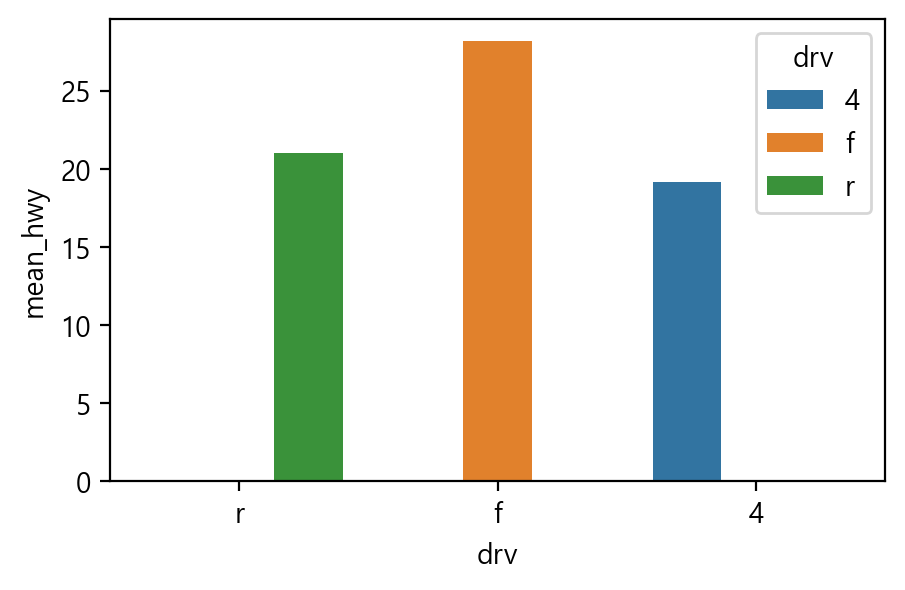

In [19]:
sns.barplot(df_mpg, x='drv', y='mean_hwy', hue='drv', order=['r', 'f', '4']);
# order : 사용자가 원하는 순서대로 막대를 정렬

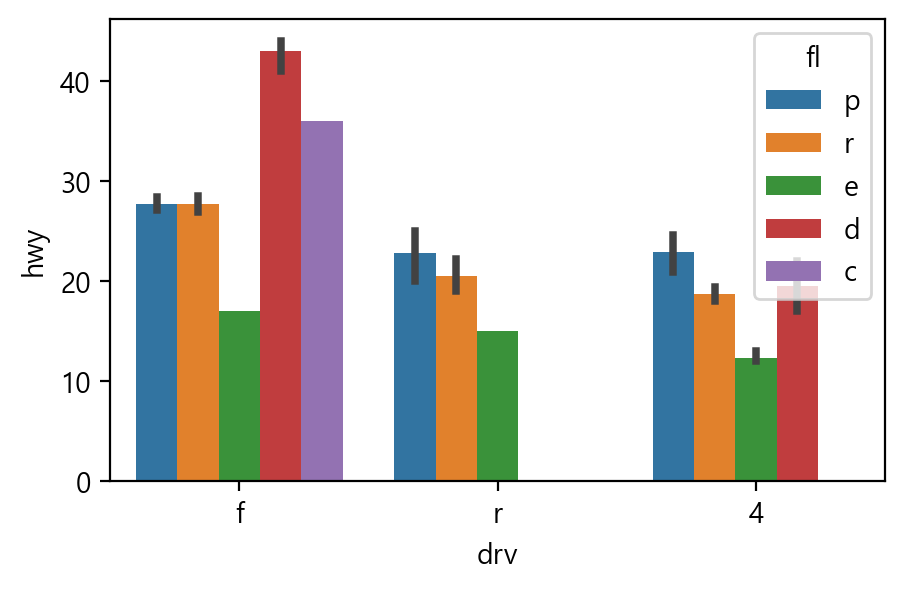

In [20]:
sns.barplot(mpg, x='drv', y='hwy', hue='fl', order=['f', 'r', '4']);

In [21]:
mpg.groupby('drv', as_index=False).count()

,drv,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,category
0,4,103,103,103,103,103,103,103,103,103,103
1,f,106,106,106,106,106,106,106,106,106,106
2,r,25,25,25,25,25,25,25,25,25,25


In [22]:
mpg.groupby('drv', as_index=False).count()[['drv', 'model']]

,drv,model
0,4,103
1,f,106
2,r,25


In [23]:
mpg.groupby('drv', as_index=False).count()[['drv', 'model']].rename(columns={'model': 'n'})

,drv,n
0,4,103
1,f,106
2,r,25


In [25]:
df_mpg = mpg.groupby('drv', as_index=False).agg(n = ('drv', 'count') )
df_mpg    # : 그룹을 'drv'별로 나눈 뒤, 각 그룹마다 drv열의 값을 count

,drv,n
0,4,103
1,f,106
2,r,25


In [26]:
df_mpg2 = mpg.groupby('drv').agg(n = ('drv','count'))
df_mpg2

,n
drv,
4,103
f,106
r,25


<Axes: xlabel='drv', ylabel='n'>

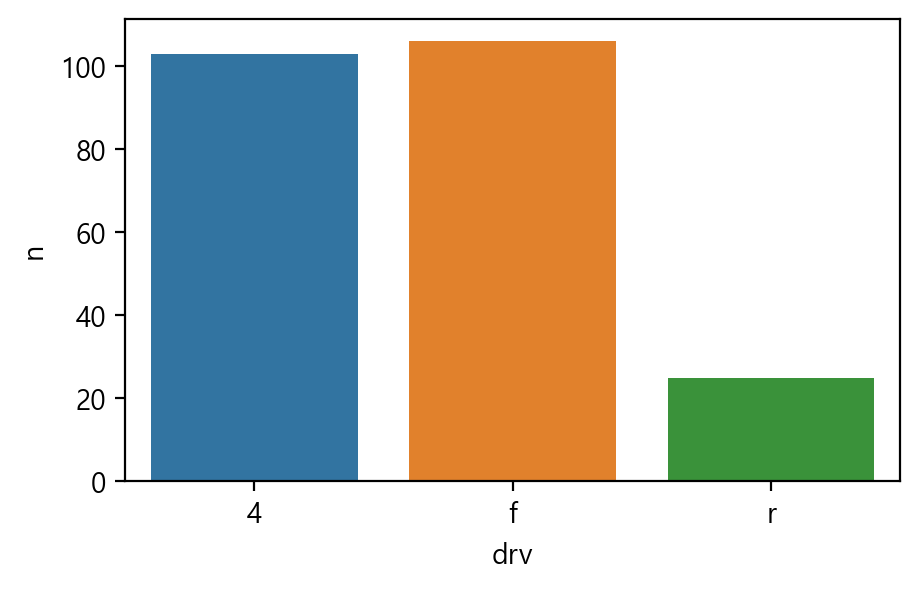

In [27]:
sns.barplot(df_mpg, x='drv', y='n')

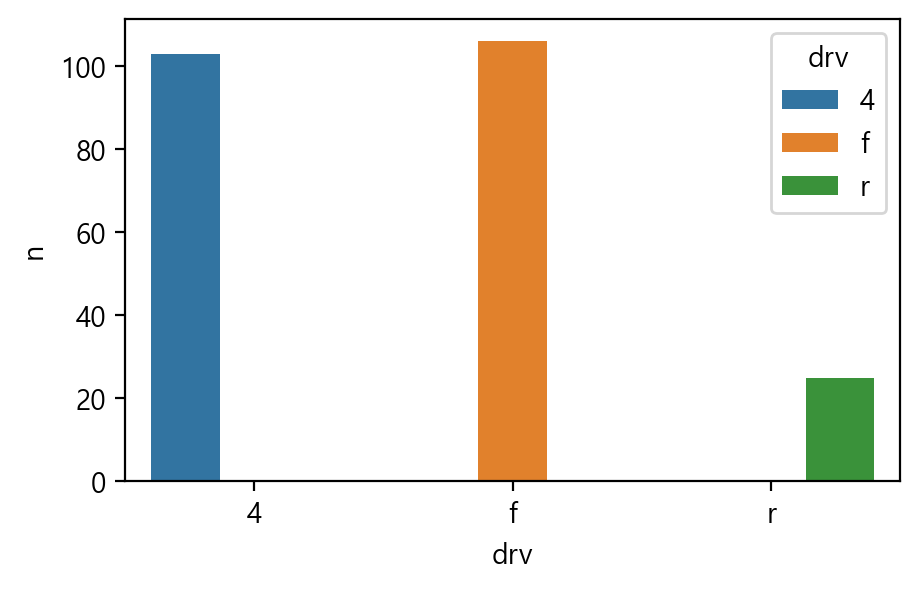

In [28]:
sns.barplot(df_mpg, x='drv', y='n', hue='drv');

<Axes: xlabel='drv', ylabel='count'>

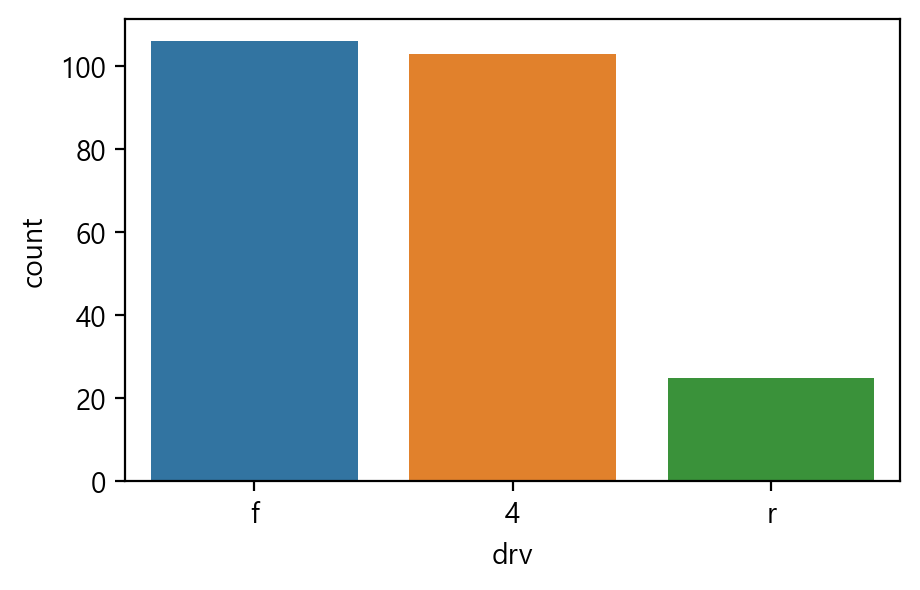

In [29]:
sns.countplot(mpg, x='drv')

| 항목           | `countplot()`                | `barplot()`                       |
| ------------ | ---------------------------- | --------------------------------- |
| **목적**       | \*\*범주형 데이터의 개수(빈도)\*\*를 시각화 | \*\*평균(또는 다른 통계값)\*\*을 시각화        |
| **자동 집계**    | **자동으로 개수를 셈**               | 사용자가 직접 **집계된 값을 제공하거나 평균 등을 계산** |
| **y값 필요 여부** | ❌ 필요 없음 (`x`만 있으면 됨)         | ✅ `x`와 `y` 둘 다 필요함                |
| **예시**       | 성별 인원 수                      | 성별 평균 키                           |


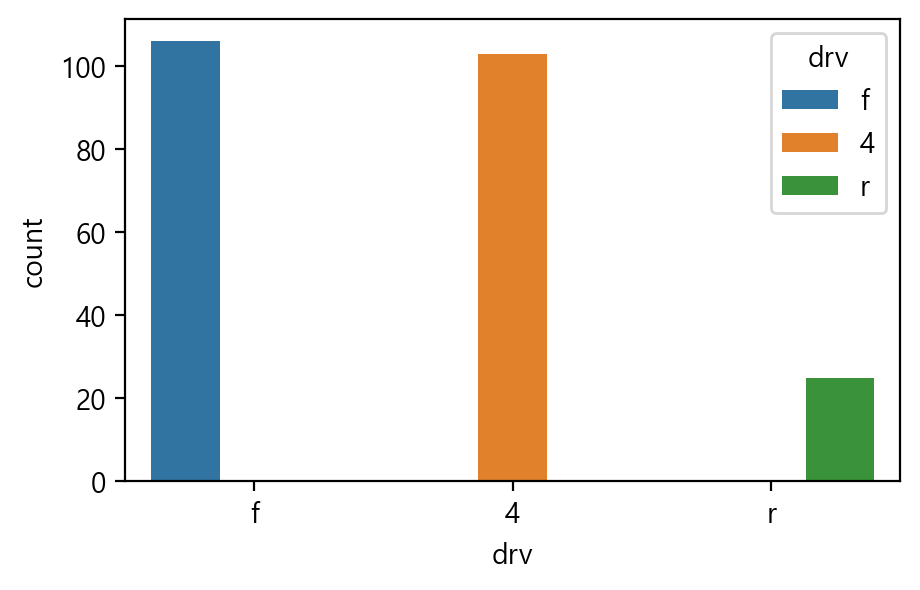

In [30]:
sns.countplot(mpg, x='drv', hue='drv');

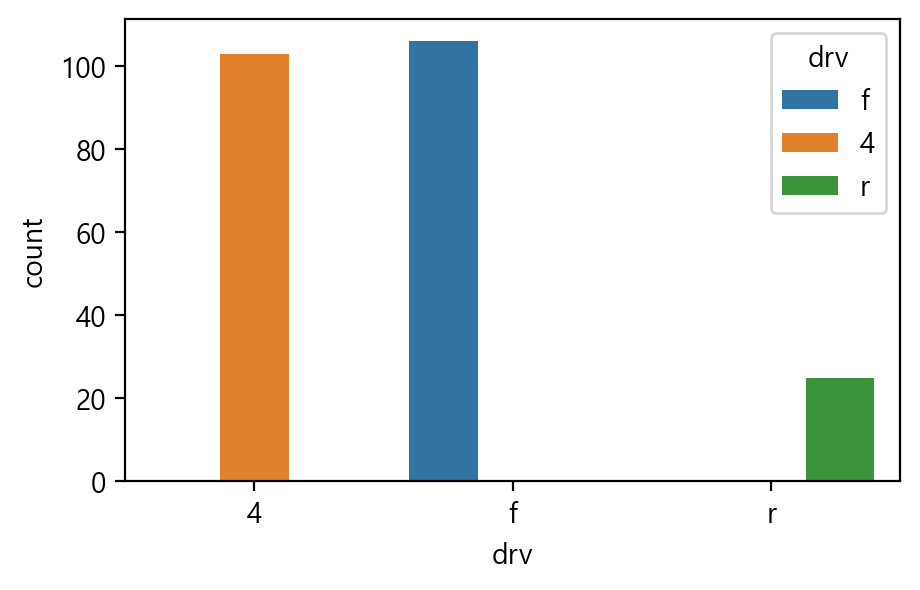

In [32]:
sns.countplot(mpg, x='drv', hue='drv', order=['4', 'f', 'r']);

<Axes: xlabel='drv', ylabel='n'>

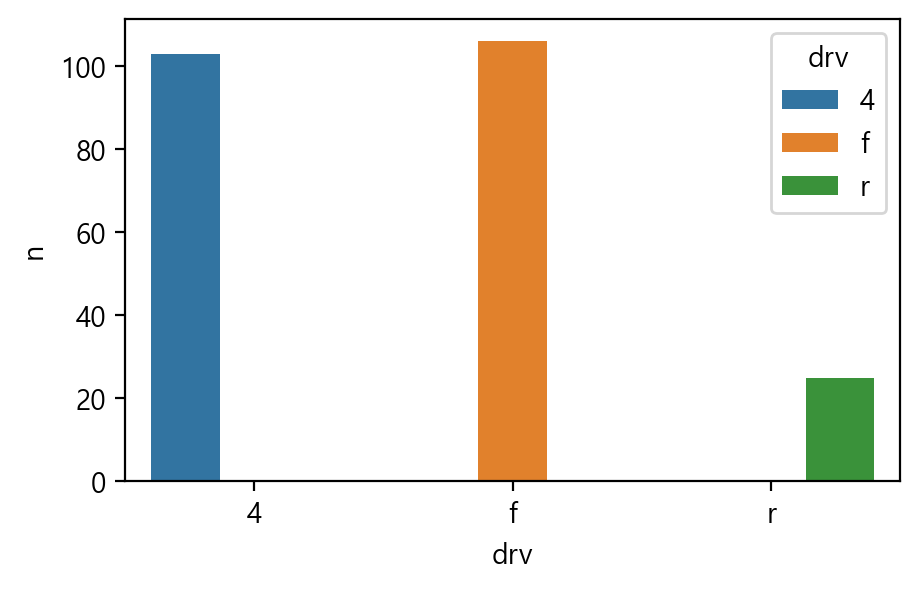

In [33]:
sns.barplot(df_mpg, x='drv', y='n', hue='drv')

## economics.csv

In [34]:
eco = pd.read_csv('data/economics.csv')
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


### 주요 변수 설명
##### - date: 데이터가 기록된 날짜 (연도-월-일 형식)
##### - pce: 개인소비지출 (Personal Consumption Expenditures), 달러 단위
##### - pop: 전체 인구수 (Population)
##### - psavert: 개인저축률 (Personal Savings Rate), %
##### - uempmed: 실업 기간의 중앙값 (Median Duration of Unemployment), 주 단위
##### - unemploy: 실업자 수 (Unemployed), 천 명 단위

In [35]:
eco.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [36]:
eco.shape

(574, 6)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


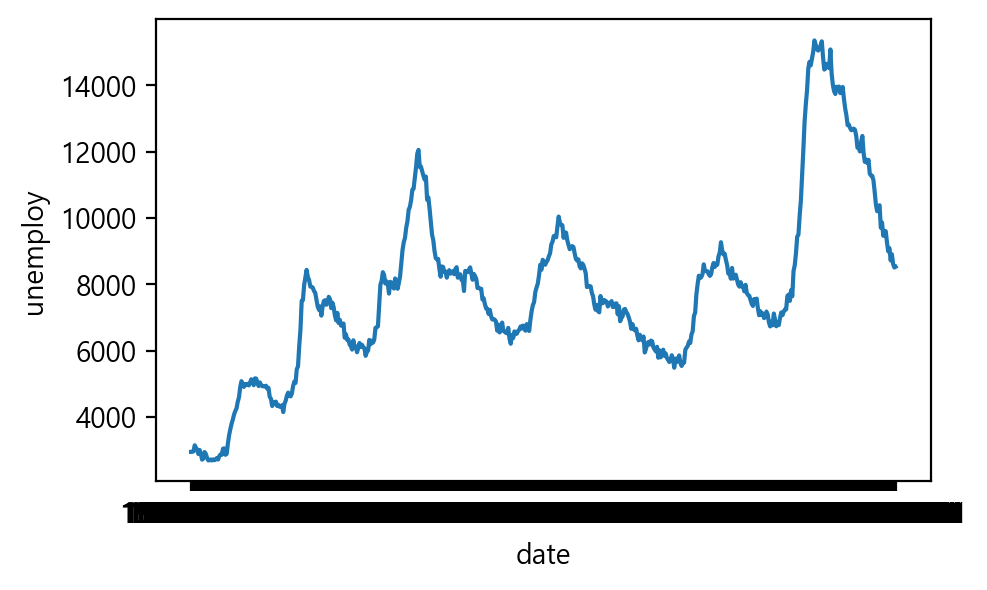

In [39]:
sns.lineplot(eco, x='date', y='unemploy');

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


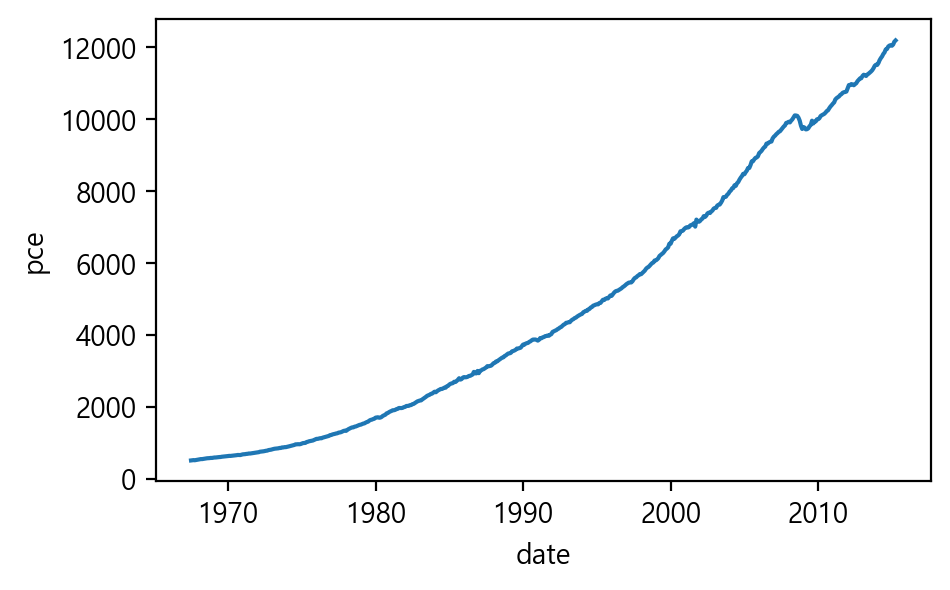

In [40]:
sns.lineplot(eco, x=pd.to_datetime(eco['date']), y='pce');

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


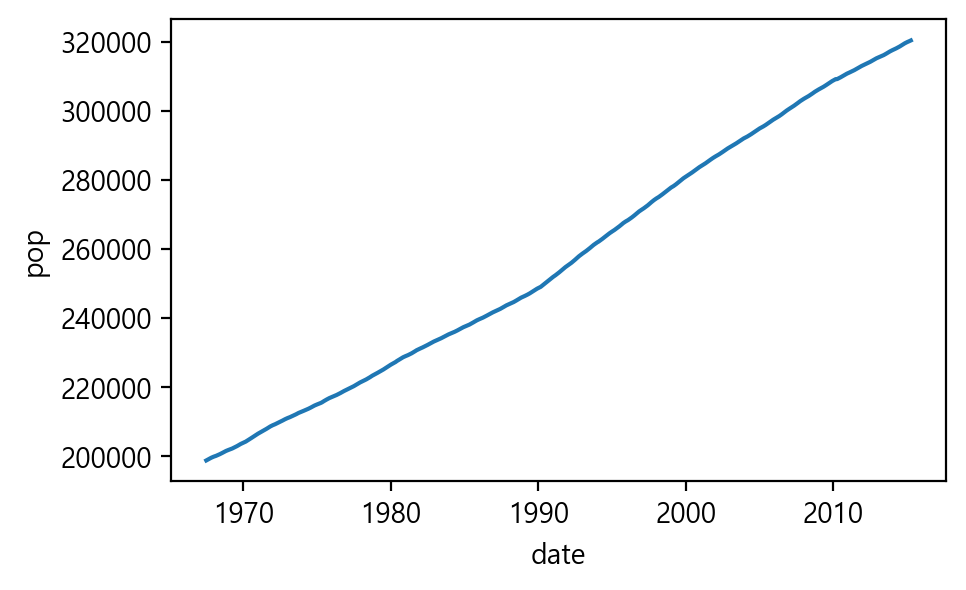

In [41]:
sns.lineplot(eco, x=pd.to_datetime(eco['date']), y='pop');

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


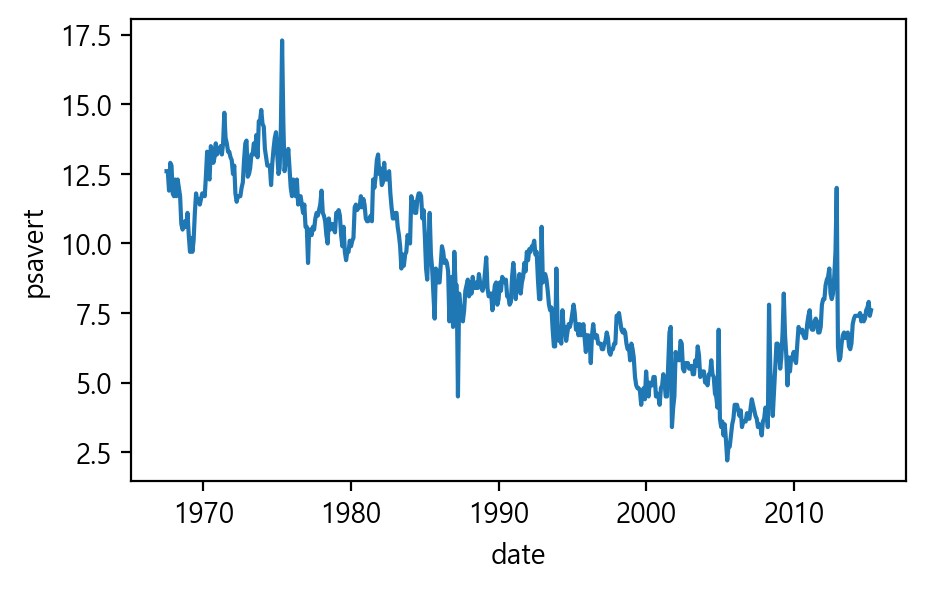

In [44]:
sns.lineplot(eco, x=pd.to_datetime(eco['date']), y='psavert');

In [45]:

eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [46]:
eco[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [49]:
eco[['date','date2']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    574 non-null    object        
 1   date2   574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 9.1+ KB


In [50]:
eco.date2.dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int32

In [52]:
eco['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int32

In [54]:
eco['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int32

In [55]:
eco['year'] = eco['date2'].dt.year
eco['month'] = eco['date2'].dt.month
eco['day'] = eco['date2'].dt.day
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
 7   year      574 non-null    int32         
 8   month     574 non-null    int32         
 9   day       574 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1), object(1)
memory usage: 38.2+ KB


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


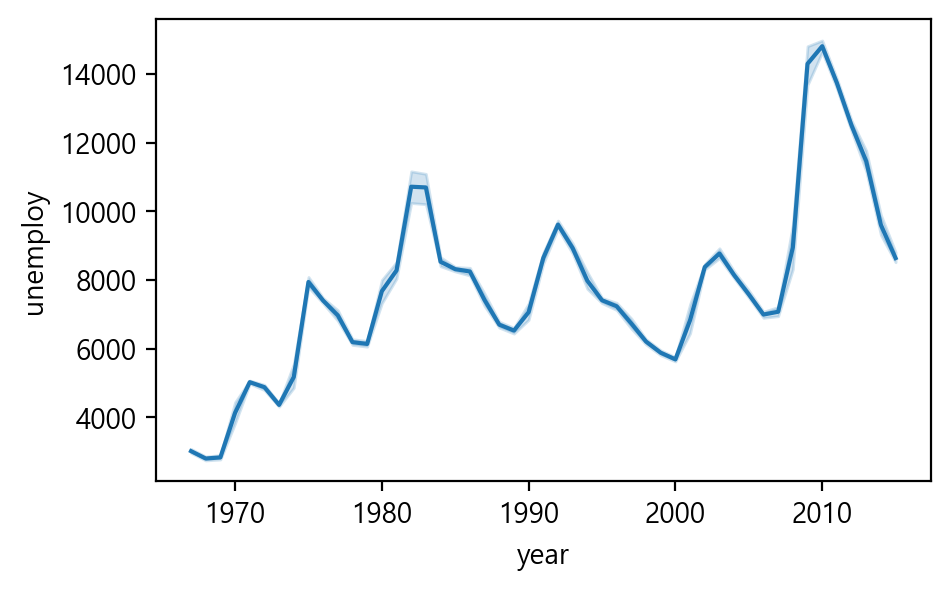

In [56]:
sns.lineplot(eco, x=eco['year'], y='unemploy');

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


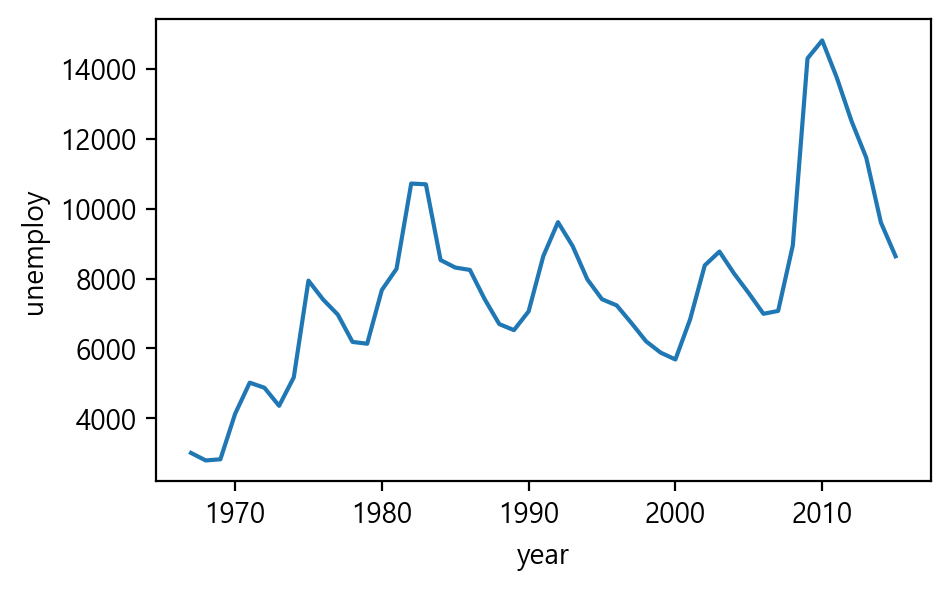

In [60]:
sns.lineplot(eco, x=eco['year'], y='unemploy', errorbar=None);
# errorbar : seaborn의 barplot, lineplot등에서 오차막대를 표시할 때 사용하는 설정

## baxplot

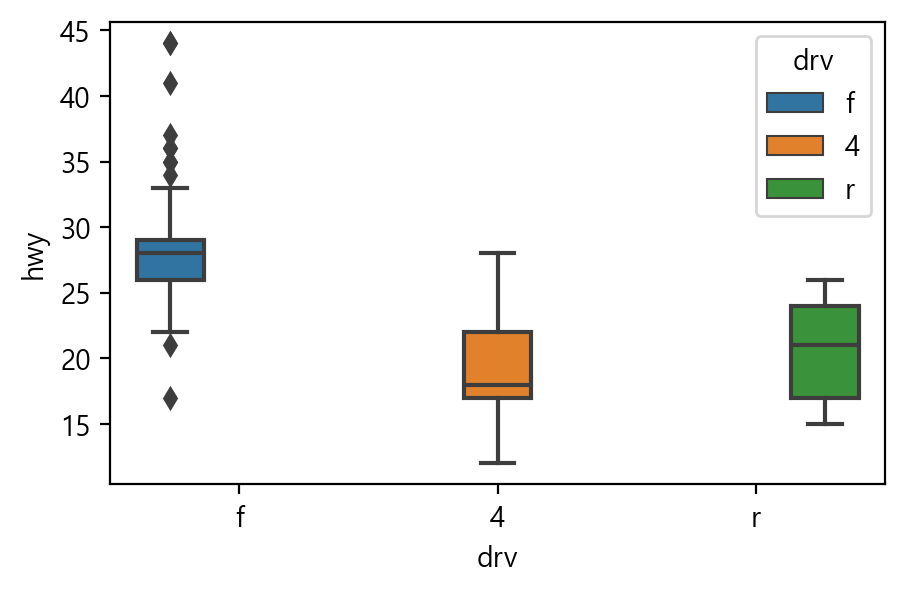

In [61]:
sns.boxplot(mpg, x='drv', y='hwy',  hue='drv');

In [62]:
plt.rcParams.update({'figure.figsize': [7, 3]})

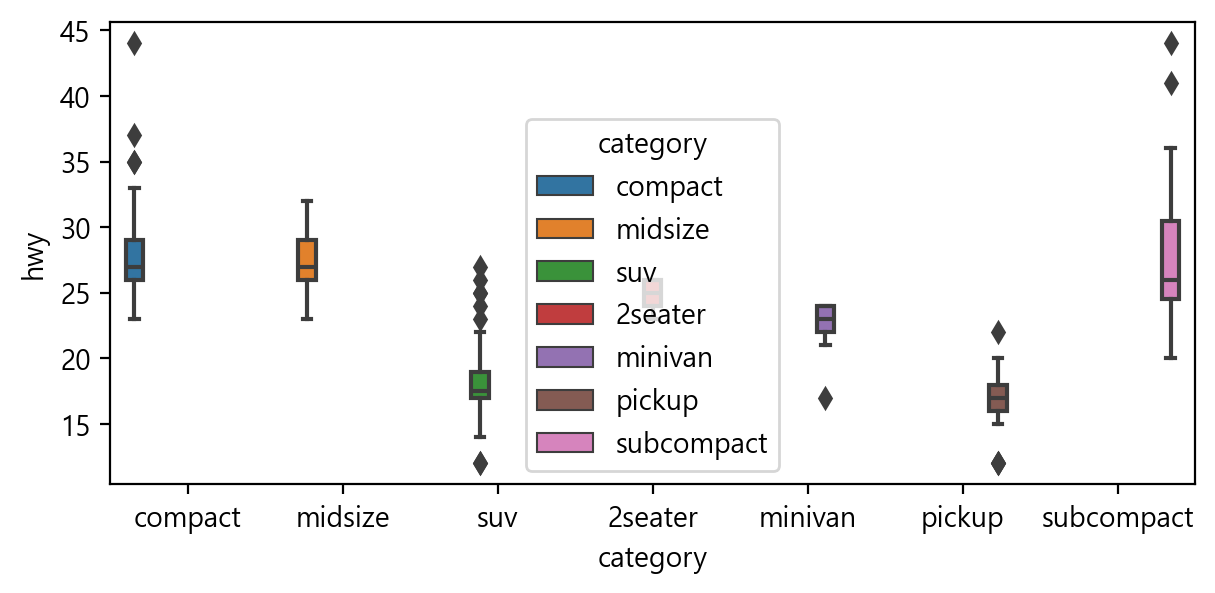

In [63]:
sns.boxplot(mpg, x='category', y='hwy', hue='category');

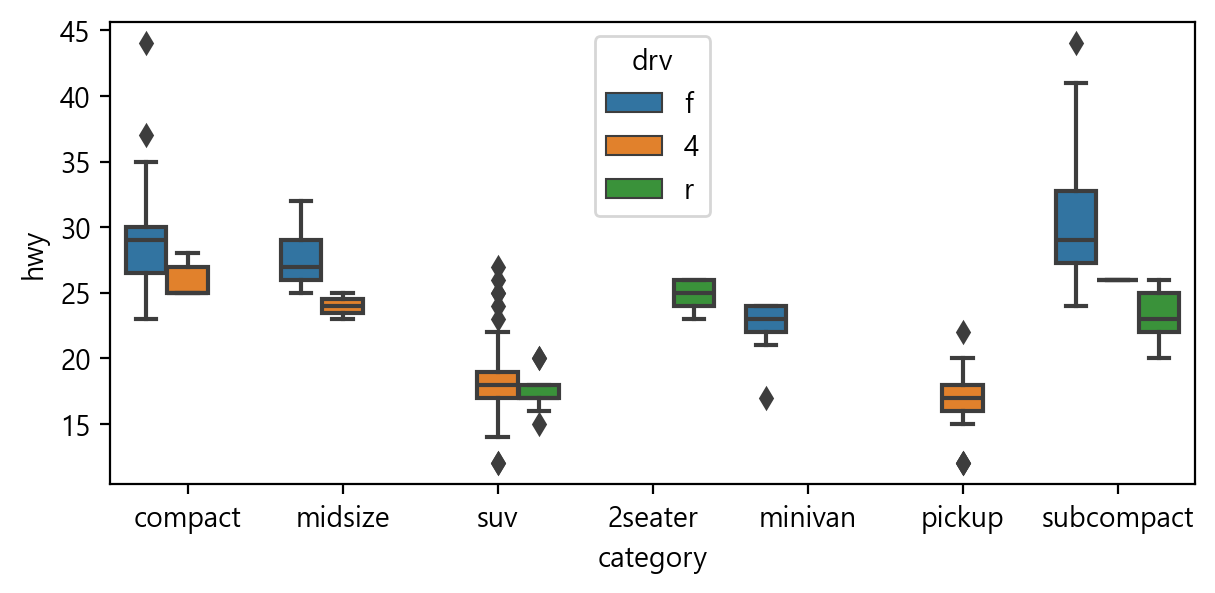

In [64]:
sns.boxplot(mpg, x='category', y='hwy', hue='drv');

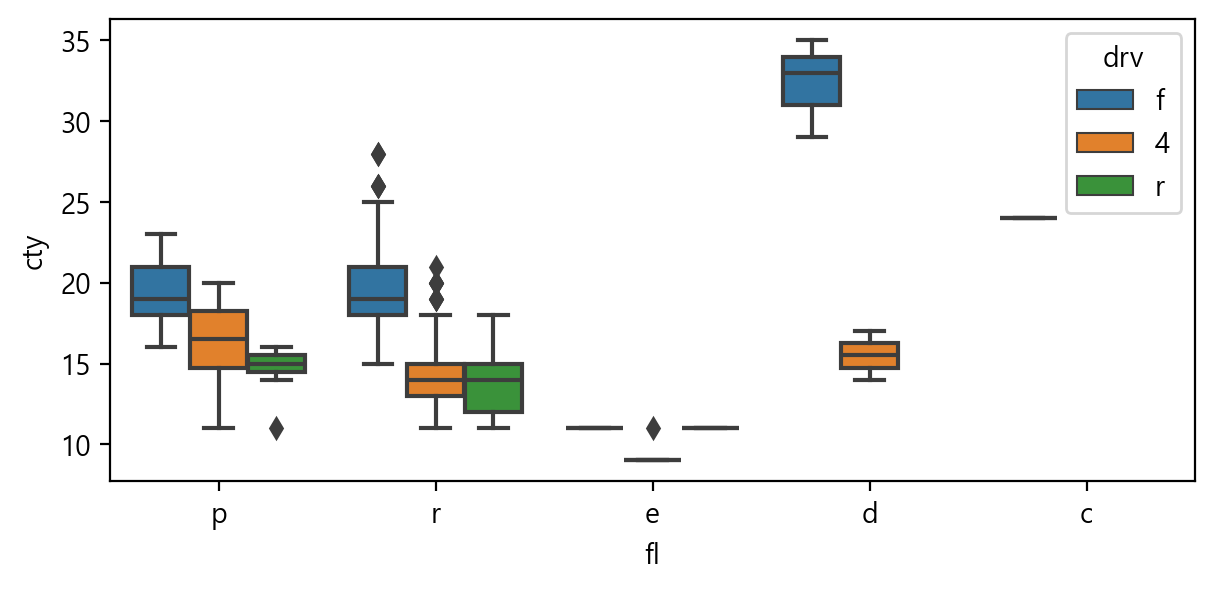

In [65]:
sns.boxplot(mpg, x='fl', y='cty', hue='drv');

In [66]:
plt.rcParams.update({'figure.figsize': [5, 3]})

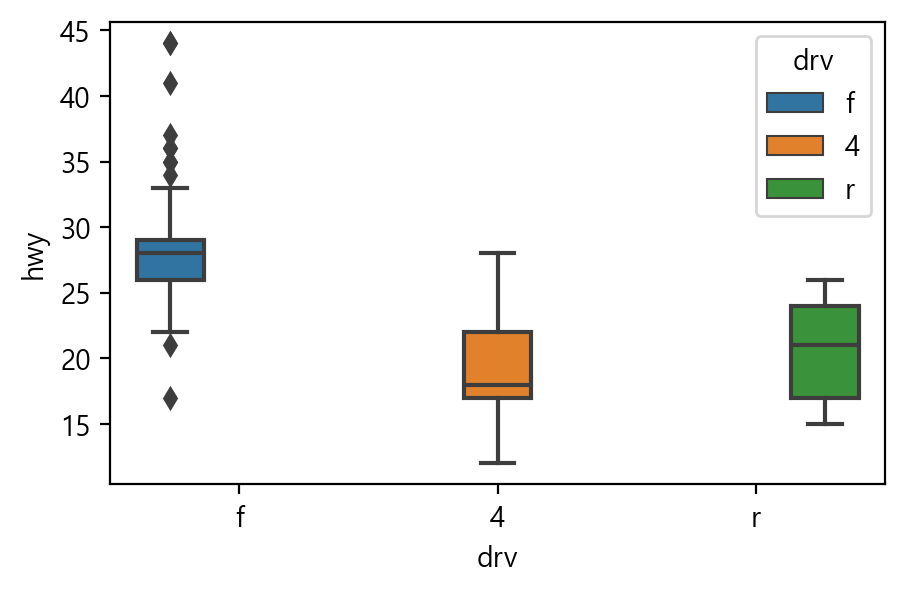

In [67]:
sns.boxplot(mpg, x='drv', y = 'hwy', hue='drv');

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


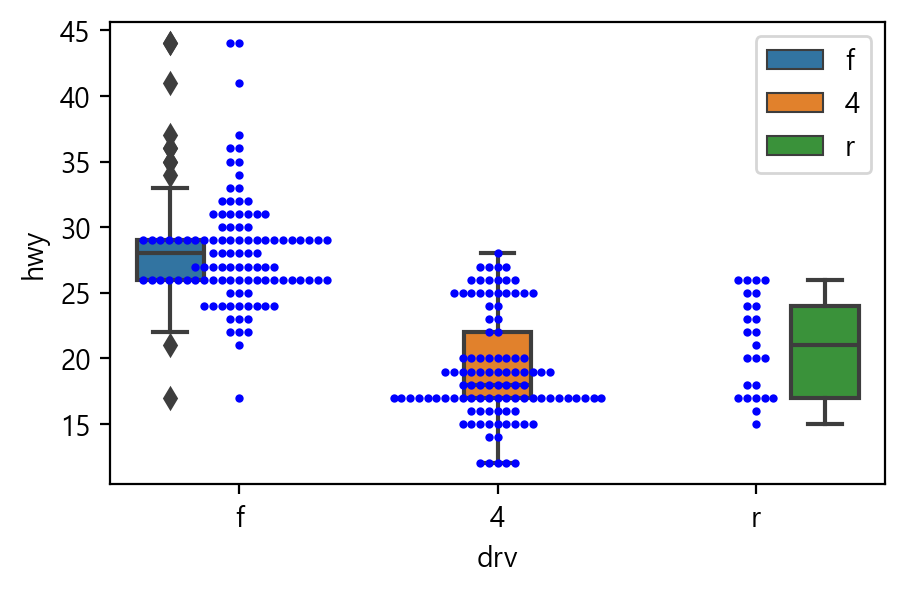

In [68]:
sns.boxplot(mpg, x='drv', y = 'hwy', hue='drv');
sns.swarmplot(mpg, x='drv', y = 'hwy', color='b', size=3);
# swarmplot : 데이터가 겹치지 않도록 퍼트려서 범주형 변수에 따른 개별 데이터의 분포를 시각화

In [69]:
import pandas as pd

# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id'      : [1, 2, 3, 4, 5],
                      'midterm' : [60, 80, 70, 90, 85]})

# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id'    : [1, 2, 3, 6, 7],
                      'final' : [70, 83, 65, 95, 80]})

In [70]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + ' '*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [71]:
display_side_by_side(test1, test2)

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


In [72]:
display_side_by_side(test1, test2, test1.merge(test2))

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


In [2]:
plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)